# 4. YOLOv8 Detection

Use this notebook to train, evaluate, and analyze YOLOv8-based detectors for aerial objects.

In [1]:
det_base = "object_detection_dataset"
img_paths = glob(f"{det_base}/images/train/*.jpg")
label_paths = glob(f"{det_base}/labels/train/*.txt")

print("Train Images:", len(img_paths))
print("Train Labels:", len(label_paths))


NameError: name 'glob' is not defined

In [2]:
from glob import glob

In [3]:
det_base = "object_detection_dataset"
img_paths = glob(f"{det_base}/images/train/*.jpg")
label_paths = glob(f"{det_base}/labels/train/*.txt")

print("Train Images:", len(img_paths))
print("Train Labels:", len(label_paths))

Train Images: 0
Train Labels: 0


In [4]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\Hamza\Aerial_object\notebooks


In [5]:
import os

# Go one level up if running from notebooks/
det_base = os.path.join("..", "object_detection_dataset")

img_paths = glob(os.path.join(det_base, "images", "train", "*.jpg"))
label_paths = glob(os.path.join(det_base, "labels", "train", "*.txt"))

print("Train Images:", len(img_paths))
print("Train Labels:", len(label_paths))


Train Images: 0
Train Labels: 0


In [6]:
import pathlib

# Find the root folder that contains "object_detection_dataset"
root = pathlib.Path.cwd()
while not (root / "object_detection_dataset").exists() and root != root.parent:
    root = root.parent

det_base = root / "object_detection_dataset"
print("✅ Found detection dataset at:", det_base)


✅ Found detection dataset at: c:\Users\Hamza\Aerial_object\object_detection_dataset


In [7]:
det_base = "object_detection_dataset"
img_paths = glob(f"{det_base}/images/train/*.jpg")
label_paths = glob(f"{det_base}/labels/train/*.txt")

print("Train Images:", len(img_paths))
print("Train Labels:", len(label_paths))


Train Images: 0
Train Labels: 0


In [8]:
import os

# Go one level up if running from notebooks/
det_base = os.path.join("..", "object_detection_dataset")

img_paths = glob(os.path.join(det_base, "images", "train", "*.jpg"))
label_paths = glob(os.path.join(det_base, "labels", "train", "*.txt"))

print("Train Images:", len(img_paths))
print("Train Labels:", len(label_paths))


Train Images: 0
Train Labels: 0


In [9]:
# --- Phase 2: Step 8 + Step 9 ---
# YOLOv8 Object Detection Dataset EDA
import os
from glob import glob
import random
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

# Detect project root automatically (works on any PC)
root = Path.cwd()
while not (root / "object_detection_dataset").exists() and root != root.parent:
    root = root.parent

# Correct relative dataset path
det_base = root / "object_detection_dataset"
print("✅ Found detection dataset at:", det_base)

# Define image and label paths
train_images = glob(str(det_base / "images/train/*.jpg"))
train_labels = glob(str(det_base / "labels/train/*.txt"))

print(f"Train Images: {len(train_images)}")
print(f"Train Labels: {len(train_labels)}")

# Safety check if 0 images found
if len(train_images) == 0:
    print("⚠️ No images found. Check that files are inside: ", det_base / "images/train")
else:
    # Show sample annotations
    sample_label_path = random.choice(train_labels)
    print("📄 Sample annotation file:", sample_label_path)
    with open(sample_label_path, "r") as f:
        lines = f.read().strip().split("\n")
        print("Sample labels (first 5):", lines[:5])

    # Visualize bounding boxes for a random image
    sample_image_path = sample_label_path.replace("labels", "images").replace(".txt", ".jpg")
    img = cv2.imread(sample_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w = img.shape[:2]
    for line in lines:
        class_id, x, y, bw, bh = map(float, line.split())
        x1, y1 = int((x - bw/2) * w), int((y - bh/2) * h)
        x2, y2 = int((x + bw/2) * w), int((y + bh/2) * h)
        color = (0, 255, 0) if int(class_id) == 0 else (255, 0, 0)
        label = "Bird" if int(class_id) == 0 else "Drone"
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title("📸 YOLOv8 Bounding Box Visualization")
    plt.axis("off")
    plt.show()


ModuleNotFoundError: No module named 'cv2'

In [10]:
import cv2
print("✅ OpenCV version:", cv2.__version__)


ModuleNotFoundError: No module named 'cv2'

In [11]:
%pip install opencv-python


  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
print("✅ OpenCV version:", cv2.__version__)


✅ OpenCV version: 4.12.0


In [2]:
# --- Phase 2: Step 8 + Step 9 ---
# YOLOv8 Object Detection Dataset EDA
import os
from glob import glob
import random
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

# Detect project root automatically (works on any PC)
root = Path.cwd()
while not (root / "object_detection_dataset").exists() and root != root.parent:
    root = root.parent

# Correct relative dataset path
det_base = root / "object_detection_dataset"
print("✅ Found detection dataset at:", det_base)

# Define image and label paths
train_images = glob(str(det_base / "images/train/*.jpg"))
train_labels = glob(str(det_base / "labels/train/*.txt"))

print(f"Train Images: {len(train_images)}")
print(f"Train Labels: {len(train_labels)}")

# Safety check if 0 images found
if len(train_images) == 0:
    print("⚠️ No images found. Check that files are inside: ", det_base / "images/train")
else:
    # Show sample annotations
    sample_label_path = random.choice(train_labels)
    print("📄 Sample annotation file:", sample_label_path)
    with open(sample_label_path, "r") as f:
        lines = f.read().strip().split("\n")
        print("Sample labels (first 5):", lines[:5])

    # Visualize bounding boxes for a random image
    sample_image_path = sample_label_path.replace("labels", "images").replace(".txt", ".jpg")
    img = cv2.imread(sample_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w = img.shape[:2]
    for line in lines:
        class_id, x, y, bw, bh = map(float, line.split())
        x1, y1 = int((x - bw/2) * w), int((y - bh/2) * h)
        x2, y2 = int((x + bw/2) * w), int((y + bh/2) * h)
        color = (0, 255, 0) if int(class_id) == 0 else (255, 0, 0)
        label = "Bird" if int(class_id) == 0 else "Drone"
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title("📸 YOLOv8 Bounding Box Visualization")
    plt.axis("off")
    plt.show()


✅ Found detection dataset at: c:\Users\Hamza\Aerial_object\object_detection_dataset
Train Images: 0
Train Labels: 0
⚠️ No images found. Check that files are inside:  c:\Users\Hamza\Aerial_object\object_detection_dataset\images\train


✅ Found detection dataset at: c:\Users\Hamza\Aerial_object\object_detection_dataset
Train Images: 2728
Train Labels: 2728
📄 Sample label file: c:\Users\Hamza\Aerial_object\object_detection_dataset\labels\train\labels\0155f97b5e18d7e5_jpg.rf.27426d4ee6d20581373687c1c37f2a99.txt
🔍 Sample label lines: ['0 0.47716346153846156 0.42908653846153844 0.1346153846153846 0.07572115384615384', '0 0.7788461538461539 0.5733173076923077 0.0673076923076923 0.18990384615384615']
🖼 Image Path: c:\Users\Hamza\Aerial_object\object_detection_dataset\images\train\images\0155f97b5e18d7e5_jpg.rf.27426d4ee6d20581373687c1c37f2a99.jpg


c:\Users\Hamza\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


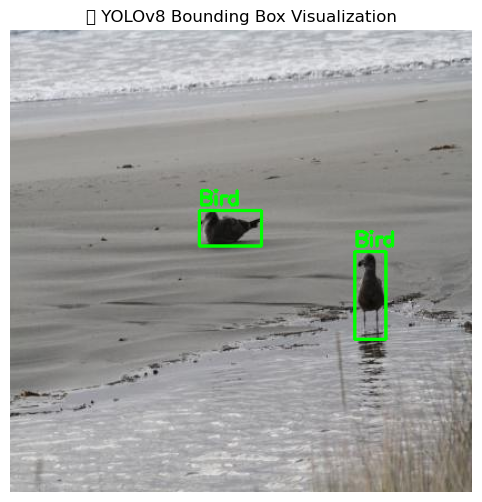

In [3]:
# --- YOLOv8 Object Detection Dataset EDA (fixed for nested structure) ---
import os
from glob import glob
import random
import matplotlib.pyplot as plt
from pathlib import Path
import cv2

# ✅ Detect root automatically
root = Path.cwd()
while not (root / "object_detection_dataset").exists() and root != root.parent:
    root = root.parent

det_base = root / "object_detection_dataset"
print("✅ Found detection dataset at:", det_base)

# ✅ Adjusted path (handles extra "images/" and "labels/" folders)
train_images = glob(str(det_base / "images/train/images/*.jpg"))
train_labels = glob(str(det_base / "labels/train/labels/*.txt"))

print(f"Train Images: {len(train_images)}")
print(f"Train Labels: {len(train_labels)}")

# ✅ Safety check
if len(train_images) == 0:
    print("⚠️ No images found. Check that files exist under:", det_base / "images/train/images")
else:
    # Pick a random sample
    sample_label_path = random.choice(train_labels)
    print("📄 Sample label file:", sample_label_path)

    # Read annotations
    with open(sample_label_path, "r") as f:
        lines = f.read().strip().split("\n")

    print("🔍 Sample label lines:", lines[:5])

    # Match image file
    sample_image_path = sample_label_path.replace("labels", "images").replace(".txt", ".jpg")
    sample_image_path = sample_image_path.replace("\\labels\\", "\\images\\")
    sample_image_path = sample_image_path.replace("/labels/", "/images/")
    sample_image_path = sample_image_path.replace("\\labels", "\\images").replace("/labels", "/images")

    print("🖼 Image Path:", sample_image_path)

    # Load image
    img = cv2.imread(sample_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    # Draw YOLO bounding boxes
    for line in lines:
        if len(line.strip()) == 0:
            continue
        class_id, x, y, bw, bh = map(float, line.split())
        x1, y1 = int((x - bw/2) * w), int((y - bh/2) * h)
        x2, y2 = int((x + bw/2) * w), int((y + bh/2) * h)
        color = (0, 255, 0) if int(class_id) == 0 else (255, 0, 0)
        label = "Bird" if int(class_id) == 0 else "Drone"
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Display
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title("📸 YOLOv8 Bounding Box Visualization")
    plt.axis("off")
    plt.show()


In [4]:
# --- Dataset Integrity Check & Summary Report ---
from pathlib import Path
import pandas as pd

def verify_yolo_dataset(dataset_dir):
    dataset_dir = Path(dataset_dir)
    results = []

    for subset in ["train", "val", "test"]:
        img_dir = dataset_dir / "images" / subset / "images"
        lbl_dir = dataset_dir / "labels" / subset / "labels"

        img_files = sorted(list(img_dir.glob("*.jpg")))
        lbl_files = sorted(list(lbl_dir.glob("*.txt")))

        total_imgs = len(img_files)
        total_lbls = len(lbl_files)
        missing_labels = [img.name for img in img_files if not (lbl_dir / f"{img.stem}.txt").exists()]
        missing_images = [lbl.name for lbl in lbl_files if not (img_dir / f"{lbl.stem}.jpg").exists()]

        results.append({
            "Subset": subset.upper(),
            "Images": total_imgs,
            "Labels": total_lbls,
            "Missing Labels": len(missing_labels),
            "Missing Images": len(missing_images),
        })

        # Display details for missing files (if any)
        if missing_labels:
            print(f"⚠️ {subset.upper()}: {len(missing_labels)} images without labels →", missing_labels[:5])
        if missing_images:
            print(f"⚠️ {subset.upper()}: {len(missing_images)} labels without images →", missing_images[:5])

    return pd.DataFrame(results)


# Run the check
summary_df = verify_yolo_dataset(det_base)

# Display clean summary
st = "=" * 60
print(f"\n{st}\n✅ YOLOv8 Dataset Summary\n{st}")
display(summary_df)



✅ YOLOv8 Dataset Summary


,Subset,Images,Labels,Missing Labels,Missing Images
0,TRAIN,2728,2728,0,0
1,VAL,448,448,0,0
2,TEST,224,224,0,0


In [2]:
import os

base = "../object_detection_dataset"

paths = [
    f"{base}/images/train",
    f"{base}/images/val",
    f"{base}/images/test",
    f"{base}/labels/train",
    f"{base}/labels/val",
    f"{base}/labels/test",
]

for p in paths:
    print(p, "=>", len(os.listdir(p)), "files")


../object_detection_dataset/images/train => 1 files
../object_detection_dataset/images/val => 1 files
../object_detection_dataset/images/test => 1 files
../object_detection_dataset/labels/train => 1 files
../object_detection_dataset/labels/val => 1 files
../object_detection_dataset/labels/test => 1 files


In [3]:
import os

base = "../object_detection_dataset"

paths = [
    f"{base}/images/train",
    f"{base}/images/val",
    f"{base}/images/test",
    f"{base}/labels/train",
    f"{base}/labels/val",
    f"{base}/labels/test",
]

for p in paths:
    print(p, "=>", len(os.listdir(p)), "files")


../object_detection_dataset/images/train => 1 files
../object_detection_dataset/images/val => 1 files
../object_detection_dataset/images/test => 1 files
../object_detection_dataset/labels/train => 1 files
../object_detection_dataset/labels/val => 1 files
../object_detection_dataset/labels/test => 1 files


In [7]:
import os

# Correct relative path (go up one level)
base = "../object_detection_dataset"

paths = [
    f"{base}/images/train",
    f"{base}/images/val",
    f"{base}/images/test",
    f"{base}/labels/train",
    f"{base}/labels/val",
    f"{base}/labels/test",
]

for p in paths:
    print(p, "=>", len(os.listdir(p)), "files")


../object_detection_dataset/images/train => 2728 files
../object_detection_dataset/images/val => 448 files
../object_detection_dataset/images/test => 224 files
../object_detection_dataset/labels/train => 2728 files
../object_detection_dataset/labels/val => 448 files
../object_detection_dataset/labels/test => 224 files


In [8]:
from ultralytics import YOLO

# Load YOLOv8 model (You can use nano or small)
model = YOLO("yolov8n.pt")  # fastest version
# model = YOLO("yolov8s.pt")  # more accurate

# Train the model
model.train(
    data="yolo_dataset.yaml",
    epochs=50,         # increase to 100 for higher accuracy
    imgsz=640,
    batch=16,
    workers=2,
    device='cpu',      # if you have GPU: device=0
)


ModuleNotFoundError: No module named 'ultralytics'

In [9]:
%pip install ultralytics --upgrade



  Using cached ultralytics-8.3.229-py3-none-any.whl.metadata (37 kB)
  Using cached polars-1.35.2-py3-none-any.whl.metadata (10 kB)
  Using cached ultralytics_thop-2.0.18-py3-none-any.whl.metadata (14 kB)
  Using cached polars_runtime_32-1.35.2-cp39-abi3-win_amd64.whl.metadata (1.5 kB)
Using cached ultralytics-8.3.229-py3-none-any.whl (1.1 MB)
Using cached polars-1.35.2-py3-none-any.whl (783 kB)
Using cached polars_runtime_32-1.35.2-cp39-abi3-win_amd64.whl (41.3 MB)
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/4.3 MB 1.8 MB/s eta 0:00:03
   ------- -------------------------------- 0.8/4.3 MB 1.8 MB/s eta 0:00:02
   ------------ --------------------------- 1.3/4.3 MB 1.8 MB/s eta 0:00:02
   ---------------- ----------------------- 1.8/4.3 MB 2.1 MB/s eta 0:00:02
   ------------------------ --------------- 2.6/4.3 MB 2.2 MB/s eta 0:00:01
   -------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.9.0 requires torch==2.9.0, but you have torch 2.9.1 which is incompatible.
unsloth 2025.10.1 requires transformers!=4.52.0,!=4.52.1,!=4.52.2,!=4.52.3,!=4.53.0,!=4.54.0,!=4.55.0,!=4.55.1,<=4.56.2,>=4.51.3, but you have transformers 4.57.1 which is incompatible.
unsloth-zoo 2025.10.1 requires transformers!=4.52.0,!=4.52.1,!=4.52.2,!=4.52.3,!=4.53.0,!=4.54.0,!=4.55.0,!=4.55.1,<=4.56.2,>=4.51.3, but you have transformers 4.57.1 which is incompatible.
xformers 0.0.32.post2 requires torch==2.8.0, but you have torch 2.9.1 which is incompatible.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import ultralytics
ultralytics.__version__


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Hamza\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


'8.3.229'

In [11]:
from ultralytics import YOLO


In [12]:
from ultralytics import YOLO

# Load pretrained model
model = YOLO("yolov8n.pt")

# Train the model
model.train(
    data="yolo_dataset.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    patience=10,
    device="cpu"   # or "cuda" if you have GPU
)


Ultralytics 8.3.229  Python-3.13.5 torch-2.9.1+cpu CPU (Intel Core Ultra 7 255HX)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretraine

: 

In [1]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="yolo_dataset.yaml",
    epochs=30,
    imgsz=320,   # Reduced from 640 → uses 70% less RAM
    batch=4,     # Reduced batch → avoids RAM crash
    device="cpu",  # stays safe
    workers=0      # prevents Windows multiprocessing crash
)


Ultralytics 8.3.229  Python-3.13.5 torch-2.9.1+cpu CPU (Intel Core Ultra 7 255HX)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

: 

In [3]:
from ultralytics.utils import SETTINGS

SETTINGS.update({
    "dataset_dir": "C:/Users/Hamza/Aerial_object/object_detection_dataset"
})

print("Updated dataset_dir:", SETTINGS["dataset_dir"])


KeyError: "No Ultralytics setting 'dataset_dir'. \nView Ultralytics Settings with 'yolo settings' or at 'C:\\Users\\Hamza\\AppData\\Roaming\\Ultralytics\\settings.json'\nUpdate Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings."